In [241]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Sequential - класс последовательности слоев в нейронной сети 

Dense - класс полносвязного/линейного слоя, все нейроны связаны 
друг с другом

units=1 - количество нейронов в слое(здесь 1)

input_shape=(1,) - входная размерность обьекта(у нас только один вход)

activation='relu' - функция активации, которая добавляет в слой
нелинейности(именно из-за нее мы получаем более сложные результаты)

In [242]:
from keras.layers import Dense
from keras.models import Sequential


model1=Sequential([
    Dense(1,input_shape=(1,),activation='relu')
]) #здесь мы закладываем полносвязный слой из 1 нейрона и 1 вход
#также для конкретного слоя можно задать свою функцию активации

model1.summary() #резюме нашей модели
#видим один слой dense_1, также выходная форма наша вектора с
#этого слоя 1 значение(из-за input_shape) и здесь у нас есть
#2 обучаемых параметра

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [243]:
model1.get_weights() #здесь те самые параметры
#первый это вес при признаке и смещение это второй параметр

[array([[0.32573688]], dtype=float32), array([0.], dtype=float32)]

In [244]:
import tensorflow as tf

tf.random.set_seed(10) #зафксировали веса

model=Sequential([Dense(1,input_shape=(1,),activation='relu')])

model.get_weights()

[array([[-0.6241963]], dtype=float32), array([0.], dtype=float32)]

In [245]:
X=np.array([[1],[3],[2],[10],[4],[7],[8]])
y=np.array([[3,9,6,30,12,21,24]]).T

Хотим создать нейронную сеть чтобы она поняла как из массива X
получился массив y

Нам нужен один вход и один выход и один выход(число заходи умножается на 3 и выходит)

то есть нам нужен один слой из одного нейрона

In [246]:
model=Sequential([
    Dense(1,input_shape=(1,),activation='linear')
])

model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [247]:
w1,w0=model.get_weights()
w1,w0

(array([[-0.7953398]], dtype=float32), array([0.], dtype=float32))

In [248]:
X[:1]

array([[1]])

In [249]:
model.predict(X[:1])#предсказание получается 0.03 

#получили путем сложения w1*X[:1]+w0

1/1 [==============================] - 2s 2s/step


array([[-0.7953398]], dtype=float32)

In [250]:
from keras.activations import linear
linear(w1*X[:1]+w0)

array([[-0.79533982]])

Что именно мы здесь оптимизруем

у нас задача здесь регрессии, поэтому на лучше оптимизировать MSE


In [251]:
model.compile(optimizer='sgd',loss='mse',metrics='mae')
#оптимизатор - стохастический градиентный спуск
#mse - то что именно мы оптимизируем
#можно в метриках дополнительно указать что мы хотим чтобы высчитывалось


In [252]:
model.fit(X,y,epochs=100) #100 - сколько раз наша модель пробежится
#по этим данным
#каждый раз она будет уменьшать mse в наших вычислениях
#loss - то что мы оптимизируем(функция потерь)

Epoch 1/100


1/1 [==============================] - 3s 3s/step - loss: 500.0456 - mae: 18.9767
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 42.4752 - mae: 5.4219
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 3.6746 - mae: 1.5026
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3837 - mae: 0.4808
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1038 - mae: 0.2964
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0793 - mae: 0.2548
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0765 - mae: 0.2418
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0755 - mae: 0.2371
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0746 - mae: 0.2348
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 0.0738 - mae: 0.2333
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0730 - mae

In [253]:
user_inp1,user_inp2=5,-9
print(model.predict(np.array([[user_inp1],[user_inp2]])))

1/1 [==============================] - 2s 2s/step
[[ 15.085363]
 [-26.281654]]


In [254]:
model.get_weights()

[array([[2.954787]], dtype=float32), array([0.3114285], dtype=float32)]

In [255]:
pd.DataFrame({
    'true':np.squeeze(y),
    'pred': np.squeeze(model.predict(X))
})

y

1/1 [==============================] - 2s 2s/step


array([[ 3],
       [ 9],
       [ 6],
       [30],
       [12],
       [21],
       [24]])

In [256]:
X1=np.random.randint(1,10,size=50)
X2=np.random.randint(1,10,size=50)

y=X1+X2

In [257]:
X=np.vstack([X1,X2]).T


In [258]:


y=y[None]
y=y.T


Т к сети - куча маленьких линейных регрессий, то им нужно масшабирование данных

In [259]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_norm=mms.fit_transform(X)

Создадим сеть их 2 слоев, первый слой из 3 нейронов и выходной слой из 1 нейрона

Оба числа будут заходить? в каждый из нейронов первого слоя



In [260]:
model=Sequential([
    Dense(3,input_shape=(2,),activation='linear'), # 2 символа на вход и производиться 3 сигнала(нейрона из них)
    Dense(1,activation='linear')
])

In [261]:
model.summary() #output Shape(3 нерона и 1 нейрон)

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 3)                 9         
                                                                 
 dense_64 (Dense)            (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Количество весов для одного нейрона равно 2, так как 
2 входа поступает, а вдобавок у каждого нейрона есть смещение

А второй слой ждет на вход 3 сигналов + смещение

In [262]:
model.get_weights() #тут у нас веса по слоям
# первые два array это просто веса для наших чисел(первый)
#и для смещений(второй) дальше по такой же схеме

[array([[ 0.07934737,  0.85043   , -0.47516358],
        [-0.81244254, -0.52024883, -0.27658635]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.7794601 ],
        [0.4441092 ],
        [0.38089204]], dtype=float32),
 array([0.], dtype=float32)]

In [263]:
#возьмем для оптимизации MSE
#И снова используем sgd

model.compile(optimizer='sgd',loss='mse',metrics='mae')

In [264]:
model.fit(X_norm,y,epochs=200)

Epoch 1/200


2/2 [==============================] - 3s 16ms/step - loss: 129.1708 - mae: 10.4244
Epoch 2/200
2/2 [==============================] - 0s 16ms/step - loss: 107.0173 - mae: 9.3788
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 85.8050 - mae: 8.2682
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 58.6007 - mae: 6.6603
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 30.1195 - mae: 4.7535
Epoch 6/200
2/2 [==============================] - 0s 17ms/step - loss: 12.2211 - mae: 2.9780
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 7.2306 - mae: 2.2937
Epoch 8/200
2/2 [==============================] - 0s 0s/step - loss: 6.3234 - mae: 2.1269
Epoch 9/200
2/2 [==============================] - 0s 12ms/step - loss: 5.8716 - mae: 2.0501
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 5.5623 - mae: 2.0003
Epoch 11/200
2/2 [==============================] - 0s 8ms/step - loss: 5.2268

In [265]:
test_X=[[4,2],
        [6,2]]

test_X=mms.transform(test_X)
model.predict(np.array(test_X))

1/1 [==============================] - 3s 3s/step


array([[6.0011683],
       [8.001767 ]], dtype=float32)

In [266]:
pd.DataFrame({
    'x1':X[:,0],
    'x2':X[:,1],
   'true' : np.squeeze(y),
   'pred':np.squeeze(model.predict(X_norm))
}).head(5)

2/2 [==============================] - 2s 16ms/step


,x1,x2,true,pred
0,7,8,15,14.999491
1,2,3,5,5.000141
2,8,9,17,16.999361
3,8,9,17,16.999361
4,9,3,12,12.002236


In [267]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data() 

X_train.shape,X_test.shape #28 на 28 пикселей картинки

((60000, 28, 28), (10000, 28, 28))

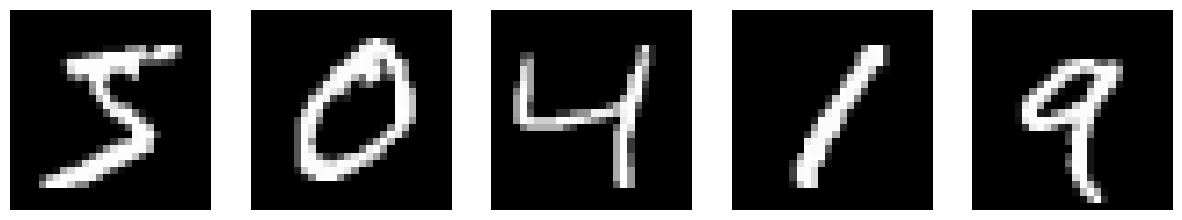

In [268]:
fig,ax=plt.subplots(1,5,figsize=(15,10))

for i in range(5):
    ax[i].imshow(X_train[i],cmap='gray')
    ax[i].axis('off')

In [269]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [270]:
#возьмем только 0 и 1
idxs=np.where((y_train==0) | (y_train==1))
y_train=y_train[idxs] #берем целевые значения только по этим индексам

In [271]:
X_train=X_train[idxs]

In [272]:
X_train.shape, y_train.shape

((12665, 28, 28), (12665,))

In [273]:
#Тоже самое для теста
idxs=np.where((y_test==0) | (y_test==1))
y_test=y_test[idxs]
X_test=X_test[idxs]

X_test.shape,y_test.shape


((2115, 28, 28), (2115,))

In [274]:
#сейчас будем стандартизировать делением на наибольшое значение

X_train=X_train/250.0
X_test=X_test/255.0

Сейчас буде изменять вид целевого класса, так как сейчас она является лейблами 0 и 1, нам нужно преобразовать в бинапный вид

Тем самым получим 2 столбика, где первый - является ли изображение
0 классом, а второй - является ли изображение 1 классаом

In [275]:
from keras.utils import to_categorical 
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)
y_train[:5],y_train_cat[:5]

(array([0, 1, 1, 1, 1], dtype=uint8),
 array([[1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32))

А чтобы сделать еще легче, поменяем масшат изображений
сделав масштаб меньше чем 28 на 28

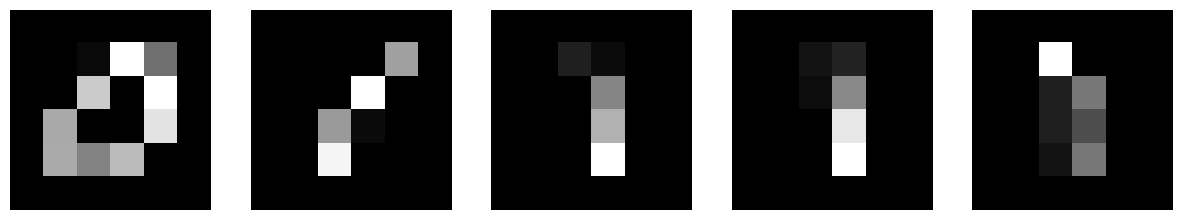

In [276]:
X_train_resized=tf.image.resize(X_train[...,np.newaxis],(6,6))[...,0] #пиздец
X_test_resized=tf.image.resize(X_test[...,np.newaxis],(6,6))[...,0]


fig,ax=plt.subplots(1,5,figsize=(15,10))

for i in range(5):
    ax[i].imshow(X_train_resized[i],cmap='gray')
    ax[i].axis('off')


пока у нас картинки это величина двумерная так как 6 на 6 это матрица

А наши полносвязные слови принимают только вектора, поэтому нужн преобразовать

In [277]:
X_train_resized[0].numpy().flatten()
X_train_resized[0].numpy().flatten().shape


(36,)

У нас будет 36 входов для каждого из наших пикселей

И очевидно 2 выхода для бинарной классификации(каждый из выходных
нейронов выдает вероятность принадлежности к определенному классу)

In [278]:
from keras.layers import Flatten

model=Sequential([
    Flatten(input_shape=(6,6)), #?
    Dense(2,activation='sigmoid')
])

model.summary()


Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 36)                0         
                                                                 
 dense_65 (Dense)            (None, 2)                 74        
                                                                 
Total params: 74 (296.00 Byte)
Trainable params: 74 (296.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Для задачи классификации для метрики которую мы хотим оптимизировать
не подойдет то что мы брали до этого, лучше взятбь бинарную
кросс-энтропию

In [279]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics='accuracy')

In [280]:
model.fit(X_train_resized,y_train_cat,epochs=10)

Epoch 1/10


396/396 [==============================] - 4s 4ms/step - loss: 0.5842 - accuracy: 0.7355
Epoch 2/10
396/396 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.9692
Epoch 3/10
396/396 [==============================] - 1s 3ms/step - loss: 0.3713 - accuracy: 0.9793
Epoch 4/10
396/396 [==============================] - 1s 3ms/step - loss: 0.3177 - accuracy: 0.9800
Epoch 5/10
396/396 [==============================] - 1s 3ms/step - loss: 0.2800 - accuracy: 0.9794
Epoch 6/10
396/396 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.9791
Epoch 7/10
396/396 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.9788
Epoch 8/10
396/396 [==============================] - 1s 3ms/step - loss: 0.2134 - accuracy: 0.9789
Epoch 9/10
396/396 [==============================] - 1s 3ms/step - loss: 0.1994 - accuracy: 0.9793
Epoch 10/10
396/396 [==============================] - 1s 4ms/step - loss: 0.1877 - accuracy: 0.9795


In [281]:
pred=model.predict(X_test_resized[:1])
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.1172469 0.8649541]]


In [282]:
pred.argmax() #берем максимальную вероятность

1

Text(0.5, 1.0, 'pred 1, true 1')

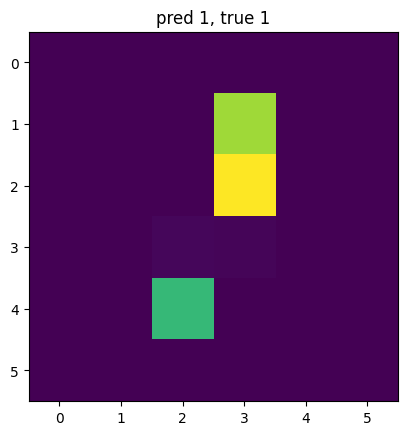

In [283]:
idx=0
plt.imshow(X_test_resized[idx])
plt.title(f'pred {pred.argmax()}, true {y_test[idx]}')